In [ ]:
!gdown https://drive.google.com/uc?id=1AyGHVflbIjzinkKBURHNVDx1wWg9JixB
!unzip cards.zip

Downloading...
From: https://drive.google.com/uc?id=1AyGHVflbIjzinkKBURHNVDx1wWg9JixB
To: /content/cards.zip
100% 30.2k/30.2k [00:00<00:00, 35.3MB/s]
Archive:  cards.zip
   creating: cards/
  inflating: cards/card4.JPG         
  inflating: cards/card1.JPG         
  inflating: cards/card2.JPG         
  inflating: cards/card3.JPG         


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
card1 = cv2.resize(cv2.imread("cards/card1.JPG", cv2.IMREAD_GRAYSCALE), (48, 48))
card2 = cv2.resize(cv2.imread("cards/card2.JPG", cv2.IMREAD_GRAYSCALE), (48, 48))
card3 = cv2.resize(cv2.imread("cards/card3.JPG", cv2.IMREAD_GRAYSCALE), (48, 48))
card4 = cv2.resize(cv2.imread("cards/card4.JPG", cv2.IMREAD_GRAYSCALE), (48, 48))
cv2.imwrite('/content/Card_1.jpg', card1)
cv2.imwrite('/content/Card_2.jpg', card2)
cv2.imwrite('/content/Card_3.jpg', card3)
cv2.imwrite('/content/Card_4.jpg', card4)

True

(6272, 48, 48)


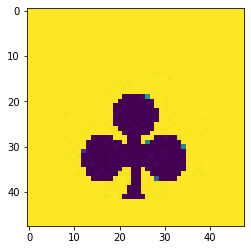

In [ ]:
from PIL import Image
card1 = Image.open('/content/Card_1.jpg')
card2 = Image.open('/content/Card_2.jpg')
card3 = Image.open('/content/Card_3.jpg')
card4 = Image.open('/content/Card_4.jpg')
def leftshift(image, n):
  image = np.array(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if (i < image.shape[1] - n):
        image[j][i] = image[j][i + n]
  return image
def rightshift(image, n):
  image = np.array(image)
  for i in range(image.shape[0], 1, -1):
    for j in range(image.shape[1]):
      if (i < image.shape[0] - n):
        image[j][i] = image[j][i - n]
  return image
def upshift(image, n):
  image = np.array(image)
  for j in range(image.shape[0]):
    for i in range(image.shape[1]):
      if (j < image.shape[0] - n and j > n):
        image[j][i] = image[j + n][i]
  return image
def downshift(image, n):
  image = np.array(image)
  for j in range(image.shape[0], 1, -1):
    for i in range(image.shape[1]):
      if (j > n and j < image.shape[0] - n):
        image[j][i] = image[j - n][i]
  return image
plt.imshow(downshift(card1, 6))
def transform_preprocess(image):
  final_images = []
  horzflip = image.transpose(method = Image.FLIP_LEFT_RIGHT)
  vertflip = image.transpose(method = Image.FLIP_TOP_BOTTOM)
  reflflip = horzflip.transpose(method = Image.FLIP_TOP_BOTTOM)
  images = [image, horzflip, vertflip, reflflip]
  for image in [image, horzflip]:
    images.append(image.rotate(90))
    images.append(image.rotate(270))
  for image in images:
    for m in range(9):
      final_images.append(leftshift(image, m))
      for l in range(6):
        final_images.append(upshift(leftshift(image, m), l))
        final_images.append(downshift(leftshift(image, m), l))
    for m in range(6):
      final_images.append(rightshift(image, m))
      for l in range(6):
        final_images.append(upshift(rightshift(image, m), l))
        final_images.append(downshift(rightshift(image, m), l))
    final_images.append(np.array(image))
  final_images = np.array(final_images)
  return final_images
index_array1 = []
index_array2 = []
index_array3 = []
index_array4 = []
Card1 = transform_preprocess(card1)
for i in range(Card1.shape[0]):
  index_array1.append(0)
Card2 = transform_preprocess(card2)
for i in range(Card2.shape[0]):
  index_array2.append(1)
Card3 = transform_preprocess(card3)
for i in range(Card3.shape[0]):
  index_array3.append(2)
Card4 = transform_preprocess(card4)
for i in range(Card4.shape[0]):
  index_array4.append(3)
index_array1 = np.array(index_array1)
index_array2 = np.array(index_array2)
index_array3 = np.array(index_array3)
index_array4 = np.array(index_array4)
FinalCards = np.concatenate((Card1, Card2, Card3, Card4), axis = 0)
Cards = [Card1, Card2, Card3, Card4]
print (FinalCards.shape)

In [ ]:
import numpy as np #Importing needed libraries
from tensorflow import random
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing import image
from keras.regularizers import l1, l2, l1_l2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pdb
from sklearn.model_selection import train_test_split
Xtrain_set1, Xtest_set1, ytrain1, ytest1 = train_test_split(Card1, index_array1, test_size = 0.25)
Xtrain_set2, Xtest_set2, ytrain2, ytest2 = train_test_split(Card2, index_array2, test_size = 0.25)
Xtrain_set3, Xtest_set3, ytrain3, ytest3 = train_test_split(Card3, index_array3, test_size = 0.25)
Xtrain_set4, Xtest_set4, ytrain4, ytest4 = train_test_split(Card4, index_array4, test_size = 0.25)
X_train = np.concatenate((Xtrain_set1, Xtrain_set2, Xtrain_set3, Xtrain_set4)) 
X_test = np.concatenate((Xtest_set1, Xtest_set2, Xtest_set3, Xtest_set4))
y_train = np.concatenate((ytrain1, ytrain2, ytrain3, ytrain4))
y_test = np.concatenate((ytest1, ytest2, ytest3, ytest4))
model = Sequential([
    Flatten(input_shape=(48, 48)),
    Dense(128, activation='relu'),
    Dense(4)
])
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 40)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
model.save('Card_Classifier.h5')

Epoch 1/40
147/147 [==============================] - 1s 3ms/step - loss: 259.8042 - accuracy: 0.2898
Epoch 2/40
147/147 [==============================] - 1s 4ms/step - loss: 36.5374 - accuracy: 0.4570
Epoch 3/40
147/147 [==============================] - 1s 4ms/step - loss: 16.5359 - accuracy: 0.5722
Epoch 4/40
147/147 [==============================] - 1s 4ms/step - loss: 17.3813 - accuracy: 0.5894
Epoch 5/40
147/147 [==============================] - 1s 3ms/step - loss: 20.2304 - accuracy: 0.5958
Epoch 6/40
147/147 [==============================] - 1s 3ms/step - loss: 10.7058 - accuracy: 0.6819
Epoch 7/40
147/147 [==============================] - 1s 3ms/step - loss: 8.5499 - accuracy: 0.7290
Epoch 8/40
147/147 [==============================] - 1s 3ms/step - loss: 3.1087 - accuracy: 0.8300
Epoch 9/40
147/147 [==============================] - 1s 3ms/step - loss: 4.2982 - accuracy: 0.8289
Epoch 10/40
147/147 [==============================] - 1s 3ms/step - loss: 9.8222 - accuracy: